In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
# Let's use the wine data note that we already split the data into train and test before
X_train = pd.read_csv('X_train_df.csv')
X_test  = pd.read_csv('X_test_df.csv')
y_train = pd.read_csv('y_train_df.csv')
y_test  = pd.read_csv('y_test_df.csv')
X_train.head()

,Unnamed: 0,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0
1,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
2,2,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0
3,3,12.04,4.30,2.38,22.0,80.0,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580.0
4,4,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.00,0.78,1.29,600.0


In [4]:
#Converting to arrays
X_train = X_train.values[:,1:]
X_test = X_test.values[:,1:]
y_train = y_train.values
y_test = y_test.values

In [5]:
print(y_train)

[[  0   3]
 [  1   1]
 [  2   3]
 [  3   2]
 [  4   3]
 [  5   1]
 [  6   2]
 [  7   1]
 [  8   2]
 [  9   2]
 [ 10   2]
 [ 11   1]
 [ 12   3]
 [ 13   2]
 [ 14   1]
 [ 15   1]
 [ 16   1]
 [ 17   2]
 [ 18   3]
 [ 19   2]
 [ 20   3]
 [ 21   3]
 [ 22   2]
 [ 23   3]
 [ 24   3]
 [ 25   2]
 [ 26   2]
 [ 27   1]
 [ 28   2]
 [ 29   2]
 [ 30   3]
 [ 31   3]
 [ 32   1]
 [ 33   2]
 [ 34   3]
 [ 35   2]
 [ 36   1]
 [ 37   2]
 [ 38   3]
 [ 39   3]
 [ 40   2]
 [ 41   2]
 [ 42   1]
 [ 43   1]
 [ 44   1]
 [ 45   3]
 [ 46   2]
 [ 47   3]
 [ 48   1]
 [ 49   2]
 [ 50   2]
 [ 51   3]
 [ 52   1]
 [ 53   2]
 [ 54   2]
 [ 55   2]
 [ 56   3]
 [ 57   1]
 [ 58   1]
 [ 59   3]
 [ 60   2]
 [ 61   2]
 [ 62   3]
 [ 63   1]
 [ 64   1]
 [ 65   2]
 [ 66   3]
 [ 67   1]
 [ 68   2]
 [ 69   1]
 [ 70   2]
 [ 71   3]
 [ 72   2]
 [ 73   2]
 [ 74   1]
 [ 75   2]
 [ 76   3]
 [ 77   3]
 [ 78   1]
 [ 79   1]
 [ 80   1]
 [ 81   1]
 [ 82   1]
 [ 83   1]
 [ 84   1]
 [ 85   1]
 [ 86   3]
 [ 87   3]
 [ 88   2]
 [ 89   1]
 [ 90   2]

In [6]:
y_train = y_train[:,1]
y_test = y_test[:,1]

In [7]:
std = StandardScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [8]:
#Let's look at the classes
cls = np.unique(y_train)
print(cls)

[1 2 3]


In [9]:
X_train.shape

(142, 13)

In [10]:
#Let's compute mean vectors
mean_vecs = []
for c in cls:
    c_mean = np.mean(X_train[y_train==c],axis=0) # mean of the features of class c
    mean_vecs.append(c_mean)
mean_vecs = np.array(mean_vecs) 

In [11]:
#mean_vecs[m1.T,m2.T,m3.T]
mean_vecs

array([[ 0.92185301, -0.31372939,  0.31854996, -0.7118766 ,  0.41221338,
         0.93923804,  0.9903949 , -0.6073227 ,  0.57479011,  0.21179739,
         0.45885282,  0.79758121,  1.16488182],
       [-0.92355978, -0.39434794, -0.41726408,  0.24885066, -0.32969332,
        -0.14379622,  0.00237287,  0.06719595,  0.04590852, -0.85074206,
         0.41455457,  0.2027356 , -0.74630767],
       [ 0.24515306,  0.97955562,  0.23190012,  0.50720295, -0.01530289,
        -0.94599482, -1.22852142,  0.65036837, -0.77978739,  1.01415316,
        -1.18936035, -1.29058543, -0.32131338]])

In [44]:
#Now let's compute SW
#But we have to compute si
Sw = np.zeros((13,13),dtype=np.float32)
for c in cls:
    x =  X_train[y_train==c].reshape(13,-1)
    mean_vc = mean_vecs[c-1].reshape(13,1)
    n  = x.shape[1] #Normalizing constant
    #print(type(x))
    Si = (1/n)*(np.dot((x-mean_vc),(x-mean_vc).T))
    Sw += Si

In [45]:
Sw.shape

(13, 13)

In [46]:
#Now let's compute SB
m = np.mean(X_train,axis=0)
m = m.reshape(1,13)

In [47]:
print(m)

[[-1.18528036e-15 -3.50267546e-16  1.01327397e-15  2.87719770e-16
  -4.37834432e-16 -6.25477760e-16  1.00076442e-16  1.87643328e-17
   1.56369440e-16  1.75133773e-16  9.88254861e-16  3.75286656e-17
   6.25477760e-17]]


In [61]:
Sb = 0 
for c in cls:
    x =  X_train[y_train==c].reshape(13,-1)
    n  = x.shape[1] #Normalizing constant
    mean_vc = mean_vecs[c-1].reshape(13,1)
    #print(type(x))
    sbc = n*(np.dot((mean_vc - m),(mean_vc - m).T))    
    Sb += sbc

In [62]:
Si.shape ,Sw.shape

((13, 13), (13, 13))

In [63]:
#We now have to compute the eigen values and eigen vectors of Sw^(-1)Sb 14X14 matrix
Eig_Mat = np.dot(np.linalg.inv(Sw),Sb)

In [64]:
eig_vals,eig_vecs = np.linalg.eig(Eig_Mat)

In [65]:
eig_vals

array([ 1.75945906e+03+0.00000000e+00j, -1.09467990e-13+0.00000000e+00j,
        4.62712178e+02+0.00000000e+00j, -2.61022723e-13+0.00000000e+00j,
        1.96014146e-13+0.00000000e+00j, -1.15510084e-13+2.46128233e-14j,
       -1.15510084e-13-2.46128233e-14j,  7.88046885e-14+0.00000000e+00j,
        5.77286029e-14+0.00000000e+00j,  5.87553382e-15+4.47543105e-14j,
        5.87553382e-15-4.47543105e-14j, -5.82419491e-14+0.00000000e+00j,
       -8.20473988e-15+0.00000000e+00j])

In [66]:
indices = np.argsort(np.abs(eig_vals))
indices_sorted = indices[::-1]

In [67]:
total = sum(eig_vals.real)
discr = [(i.real/total) for i in eig_vals[indices_sorted]]
cdf_discr = np.cumsum(discr)
print(discr)

[0.791774742167344, 0.2082252578326561, -1.1746292048426978e-16, 8.820838966955264e-17, -5.1980730519571335e-17, -5.1980730519571335e-17, -4.9261725862084135e-17, 3.546292347740647e-17, -2.6209478442466662e-17, 2.5978467358441808e-17, 2.6440508836826333e-18, 2.6440508836826333e-18, -3.692217659406632e-18]


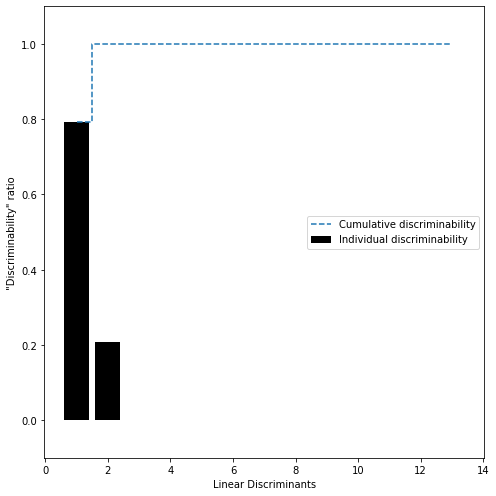

In [69]:
#Let's choose 2 eigen vectors for simplicity
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.bar(range(1,14),discr,align='center',label = 'Individual discriminability',color='black')
plt.step(range(1,14),cdf_discr,where='mid',label ='Cumulative discriminability',linestyle = '--')
plt.xlabel('Linear Discriminants')
plt.ylabel('"Discriminability" ratio')
plt.ylim([-0.1, 1.1])
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
#LDA via scikit-learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train,y_train)

In [71]:
#Let's plot a scatter plot
def plot_scatter(X,y,colors,markers):
    plt.figure(figsize=(10,10))
    for label,color,mark in zip(np.unique(y_train),colors,markers):
        plt.scatter(X[y==label, 0],X[y==label, 1],label=label,c=color,marker=mark)
    plt.xlabel('LD1')
    plt.ylabel('LD2')
    plt.legend()
    plt.tight_layout()
    plt.show()

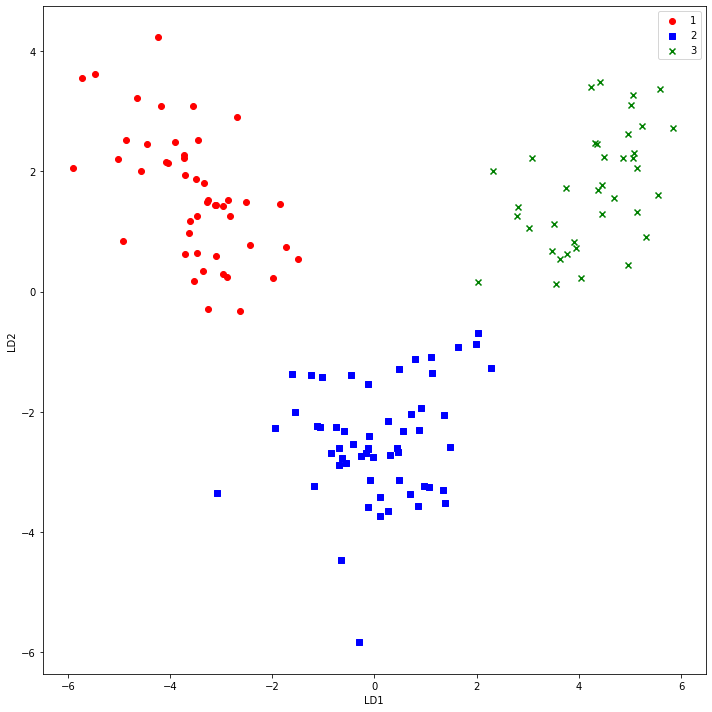

In [59]:
plot_scatter(X_train_lda,y_train,colors=['r','b','g'],markers=['o','s','x'])

In [60]:
X_train.shape

(142, 13)